<a href="https://colab.research.google.com/github/chan-anni/SarcasmDetector/blob/main/SarcasmDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# required imports
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import csv
import tensorflow as tf

In [ ]:
# got data from here: https://www.kaggle.com/datasets/danofer/sarcasm/
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/train-balanced-sarcasm.csv" # reading in the data from google drive
data = pd.read_csv(path)

data.head(15)

Mounted at /content/drive


,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2.0,-1.0,-1.0,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4.0,-1.0,-1.0,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3.0,3.0,0.0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8.0,-1.0,-1.0,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6.0,-1.0,-1.0,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...
5,0,"I don't pay attention to her, but as long as s...",only7inches,AskReddit,0.0,0.0,0.0,2016-09,2016-09-02 10:35:08,do you find ariana grande sexy ?
6,0,Trick or treating in general is just weird...,only7inches,AskReddit,1.0,-1.0,-1.0,2016-10,2016-10-23 21:43:03,What's your weird or unsettling Trick or Treat...
7,0,Blade Mastery+Masamune or GTFO!,P0k3rm4s7,FFBraveExvius,2.0,-1.0,-1.0,2016-10,2016-10-13 21:13:55,Probably Sephiroth. I refuse to taint his grea...
8,0,"You don't have to, you have a good build, buy ...",SoupToPots,pcmasterrace,1.0,-1.0,-1.0,2016-10,2016-10-27 19:11:06,What to upgrade? I have $500 to spend (mainly ...
9,0,I would love to see him at lolla.,chihawks,Lollapalooza,2.0,-1.0,-1.0,2016-11,2016-11-21 23:39:12,Probably count Kanye out Since the rest of his...


In [ ]:
# Filter the DataFrame for each label
data_label_0 = data[data['label'] == 0]
data_label_1 = data[data['label'] == 1]

# Sample 5000 comments from each label
sampled_data_label_0 = data_label_0.sample(n=5000, random_state=1)
sampled_data_label_1 = data_label_1.sample(n=5000, random_state=1)

# Combine the two datasets
combined_data = pd.concat([sampled_data_label_0, sampled_data_label_1])

# Shuffle the combined dataset
combined_data = combined_data.sample(frac=1, random_state=1).reset_index(drop=True)

# Extract comments and labels
comments = combined_data['comment']
labels = combined_data['label']

# Convert to lists or arrays if needed
shortened_list = comments.tolist()
labels_array = labels.values




In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt') # for tokenization
nltk.download('stopwords') # for stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

# Define the tokenization function
def tokenize_text(comment):
     # Ensure the input is a string
    if isinstance(comment, str):
        tokens = word_tokenize(comment)
    else:
        # Handle non-string input here. For example:
        tokens = []
    return tokens

token_data = []
for comment in shortened_list:
  token_data.append(tokenize_text(comment))
print(token_data)

[['*', 'Now', 'it', "'s", 'time', 'for', 'us', 'to', 'turn', 'on', 'Paterno', '*'], ['It', "'s", 'an', 'example', 'of', 'yet', 'another', 'piece', 'of', 'bullshit', 'which', 'refuses', 'to', 'die', ',', 'but', 'in', 'the', 'end', 'wo', "n't", 'hurt', 'her', 'much', 'if', 'at', 'all', '.'], ['My', 'thought', 'exactly', '!'], ['Or', 'you', 'do', "n't", 'appeal', 'to', 'the', '``', 'hardcore', "''", 'market', 'by', 'making', '40', 'man', 'raids', 'and', 'that', "'s", 'it', '.'], ['Because', 'presences', 'make', 'the', 'game', 'too', 'hard'], ['okay', '``', 'Head', 'Admin', 'NA', "''"], ['I', 'like', 'it', 'but', 'physics', '.'], ['Repost', '...'], ['This', 'definetely', 'could', "n't", 'have', 'waited', 'for', 'the', 'weekly', 'miracle', 'thread', '.'], ['you', 'lost', 'this'], ['Obviously', 'the', 'most', 'important', 'question', '!'], ['What', 'law', 'was', 'broken', 'though', '?'], ['She', 'just', 'wanted', 'to', 'turn', 'his', 'kneecaps', 'into', 'pulp', 'and', 'paralyze', 'him', ',',

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


Reference: https://www.youtube.com/watch?v=-8XmD2zsFBI&t=492s

In [ ]:
vocab_size = 500000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 10000


In [ ]:
# padding sentences now
tokenizer = Tokenizer()
tokenizer.fit_on_texts(token_data)

# converting tokenized sentences to sequences of integers
sequences = tokenizer.texts_to_sequences(token_data)

# setting the max length for padding by finding longest sequence sentence
# then padding the sentences w/ 0 so theyre the same length
max_length = max(len(sequence) for sequence in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating = 'post')

from keras.preprocessing.sequence import pad_sequences

# test print
# Assuming 'padded_sequences' is your array of padded sequences
num_sequences_to_print = 5  # Change this to print more or fewer sequences

# Print the first few sequences
for i in range(15):
    print(f"Sequence {i+1}: {padded_sequences[i]}")



Sequence 1: [  33   91    8   13   96   18  129    5  517   23 5661   33    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0]
Sequence 2: [   8   13   63 1205   12  380  242  850   12  782  175 5662    5  518
    3   19   16    1  288  282   14  725  121  101   36   49   37    2
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0 

In [ ]:
# splitting into train and test
training_sentences = padded_sequences[0:int(training_size*0.8)]
testing_sentences = padded_sequences[int(training_size*0.8):]
training_labels = labels[0:int(training_size*0.8)]
testing_labels = labels[int(training_size*0.8):]





print(f"Length of training sentences: {len(training_sentences)}")
print(f"Length of training labels: {len(training_labels)}")
print(f"Length of testing sentences: {len(testing_sentences)}")
print(f"Length of testing labels: {len(testing_labels)}")





Length of training sentences: 8000
Length of training labels: 8000
Length of testing sentences: 2000
Length of testing labels: 2000


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=False)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(24, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])



In [ ]:
model.summary()
model2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 147, 16)           8000000   
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 8000433 (30.52 MB)
Trainable params: 8000433 (30.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_1"
____________________________________________________________

In [ ]:
num_epochs = 30
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
# Set 'min_delta' to a small positive number or zero if you want to stop as soon as the accuracy decreases
early_stopper = EarlyStopping(monitor='val_accuracy', mode='max', patience=2, min_delta=0, verbose=1)

# Fit the model with the early stopping callback
history = model.fit(training_sentences, training_labels,
          epochs=num_epochs,
          validation_data=(testing_sentences, testing_labels),
          callbacks=[early_stopper])



Epoch 1/30
250/250 [==============================] - 32s 126ms/step - loss: 0.6932 - accuracy: 0.5056 - val_loss: 0.6926 - val_accuracy: 0.5210
Epoch 2/30
250/250 [==============================] - 30s 120ms/step - loss: 0.6912 - accuracy: 0.5530 - val_loss: 0.6896 - val_accuracy: 0.5270
Epoch 3/30
250/250 [==============================] - 38s 154ms/step - loss: 0.6776 - accuracy: 0.6065 - val_loss: 0.6742 - val_accuracy: 0.5810
Epoch 4/30
250/250 [==============================] - 47s 187ms/step - loss: 0.6300 - accuracy: 0.6787 - val_loss: 0.6681 - val_accuracy: 0.5630
Epoch 5/30
250/250 [==============================] - 31s 123ms/step - loss: 0.5701 - accuracy: 0.7172 - val_loss: 0.6352 - val_accuracy: 0.6325
Epoch 6/30
250/250 [==============================] - 30s 119ms/step - loss: 0.5232 - accuracy: 0.7479 - val_loss: 0.6370 - val_accuracy: 0.6440
Epoch 7/30
250/250 [==============================] - 30s 121ms/step - loss: 0.4817 - accuracy: 0.7749 - val_loss: 0.6621 - val_ac

In [ ]:
num_epochs = 30
from tensorflow.keras.callbacks import EarlyStopping
# Define early stopping callback
# Set 'min_delta' to a small positive number or zero if you want to stop as soon as the accuracy decreases
early_stopper = EarlyStopping(monitor='val_accuracy', mode='max', patience=2, min_delta=0, verbose=1)
history2 = model2.fit(training_sentences, training_labels,
          epochs=num_epochs,
          validation_data=(testing_sentences, testing_labels),
          callbacks=[early_stopper])

Epoch 1/30
250/250 [==============================] - 66s 247ms/step - loss: 0.6940 - accuracy: 0.5630 - val_loss: 0.6551 - val_accuracy: 0.6140
Epoch 2/30
250/250 [==============================] - 57s 229ms/step - loss: 0.5720 - accuracy: 0.7199 - val_loss: 0.6443 - val_accuracy: 0.6405
Epoch 3/30
250/250 [==============================] - 63s 252ms/step - loss: 0.4201 - accuracy: 0.8223 - val_loss: 0.7431 - val_accuracy: 0.6330
Epoch 4/30
250/250 [==============================] - 55s 219ms/step - loss: 0.2805 - accuracy: 0.8940 - val_loss: 0.8830 - val_accuracy: 0.6330
Epoch 4: early stopping


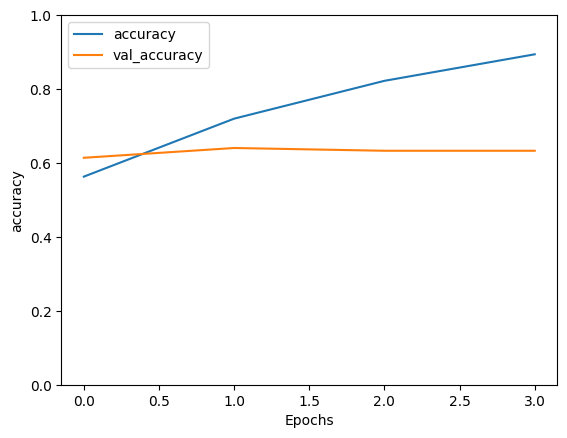

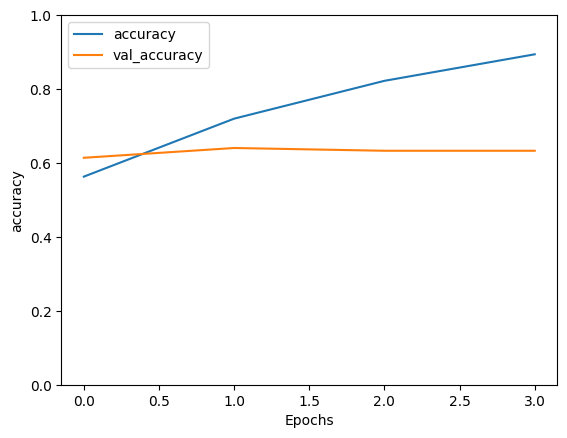

In [ ]:
import matplotlib.pyplot as plt



def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.ylim(0, 1)
  plt.show()
plot_graphs(history2, "accuracy")

def plot_graphs(history, string):
  plt.plot(history2.history[string])
  plt.plot(history2.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.ylim(0, 1)
  plt.show()

plot_graphs(history2, "accuracy")


63/63 [==============================] - 0s 2ms/step


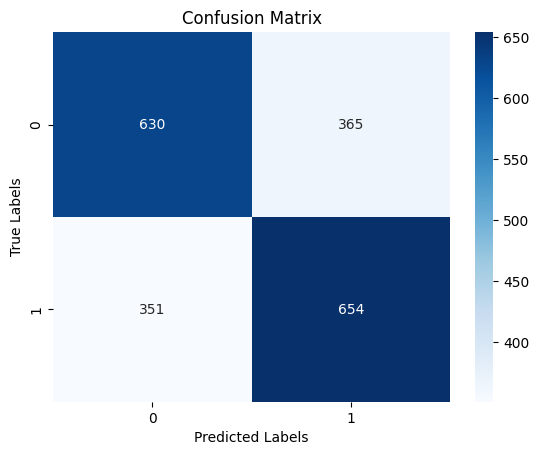

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Get predictions
predictions = model.predict(testing_sentences)
# Convert probabilities to class labels based on a threshold (e.g., 0.5)
predicted_labels = (predictions > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(testing_labels, predicted_labels)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

63/63 [==============================] - 2s 26ms/step


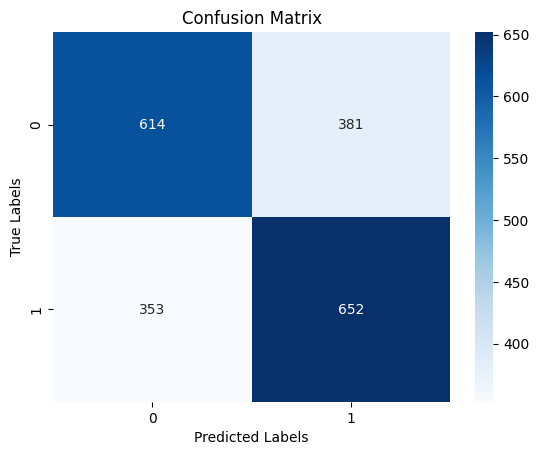

In [ ]:
# Get predictions
predictions = model2.predict(testing_sentences)
# Convert probabilities to class labels based on a threshold (e.g., 0.5)
predicted_labels = (predictions > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(testing_labels, predicted_labels)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
sentence = input("What would you like to say? ")
print("You said:", sentence)
sequence = tokenizer.texts_to_sequences([sentence])
padded_sequence = pad_sequences(sequence, maxlen=max_length, padding=padding_type, truncating=trunc_type)

prediction = model2.predict(padded_sequence)

is_sarcastic = prediction[0][0] > 0.5

print("That sentence is sarcastic" if is_sarcastic else "That sentence is not sarcastic")

What would you like to say? Jordan will definitly be president
You said: Jordan will definitly be president
1/1 [==============================] - 0s 32ms/step
That sentence is not sarcastic
